PWV (Normal Artery): 6.87 m/s
PWV (Stiff Artery): 13.74 m/s
Detection Result (Normal): High Risk
Detection Result (Stiff): High Risk


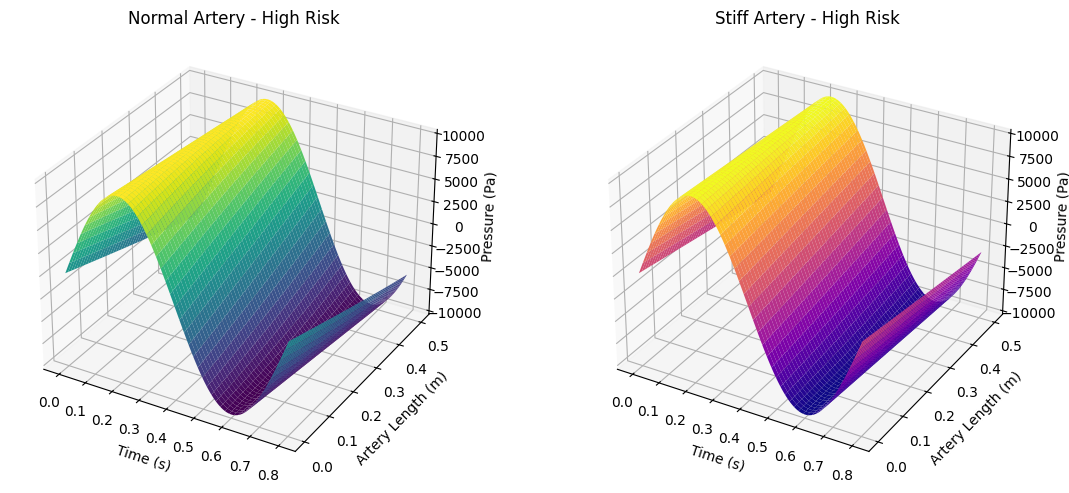

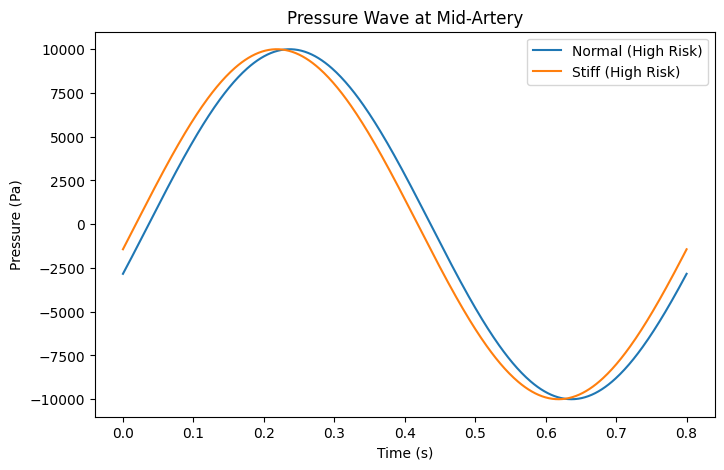

In [1]:
import numpy as np
import matplotlib.pyplot as plt


rho = 1060          # Blood density (kg/m^3)
R = 0.004            # Artery radius (m)
h = 0.0008           # Arterial wall thickness (m)

# Elastic modulus: normal vs stiff arteries
E_normal = 5e5       # Normal artery (Pa)
E_stiff = 2e6        # Stiff artery (Pa)

# Heart rate
f = 1.25             # Hz
T = 1/f
t = np.linspace(0, T, 500)


PWV_normal = np.sqrt(E_normal * h / (2 * rho * R))
PWV_stiff = np.sqrt(E_stiff * h / (2 * rho * R))

print(f"PWV (Normal Artery): {PWV_normal:.2f} m/s")
print(f"PWV (Stiff Artery): {PWV_stiff:.2f} m/s")

# Threshold for detecting stiffness
PWV_threshold = 6.0  # m/s, typical physiological range

# Risk detection
risk_normal = "Normal" if PWV_normal < PWV_threshold else "High Risk"
risk_stiff = "Normal" if PWV_stiff < PWV_threshold else "High Risk"

print(f"Detection Result (Normal): {risk_normal}")
print(f"Detection Result (Stiff): {risk_stiff}")


P0 = 10000  # Pressure amplitude (Pa)
x = np.linspace(0, 0.5, 200)  # 0.5 m artery length

pressure_normal = np.array([P0 * np.sin(2*np.pi*f*(t - xi/PWV_normal)) for xi in x])
pressure_stiff = np.array([P0 * np.sin(2*np.pi*f*(t - xi/PWV_stiff)) for xi in x])


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(t, x)
ax.plot_surface(X, Y, pressure_normal, cmap='viridis')
ax.set_title(f"Normal Artery - {risk_normal}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Artery Length (m)")
ax.set_zlabel("Pressure (Pa)")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, pressure_stiff, cmap='plasma')
ax2.set_title(f"Stiff Artery - {risk_stiff}")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Artery Length (m)")
ax2.set_zlabel("Pressure (Pa)")

plt.tight_layout()
plt.show()


mid_index = len(x)//2
plt.figure(figsize=(8,5))
plt.plot(t, pressure_normal[mid_index], label=f"Normal ({risk_normal})")
plt.plot(t, pressure_stiff[mid_index], label=f"Stiff ({risk_stiff})")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.title("Pressure Wave at Mid-Artery")
plt.legend()
plt.show()
